In [1]:
import bigbang.ietfattendance as ia
import pandas as pd

In [2]:
alld = ia.all_attendance()

In [3]:
iso_counts = alld.groupby(['mn','ISO 3166 Code']).count()['First Name'].reset_index()

In [4]:
counts = iso_counts.pivot(index='mn',
                          columns='ISO 3166 Code',
                          values='First Name').fillna(0)

In [5]:
topn = 10

topn_counts = counts[counts.sum().sort_values(ascending=False)[:topn].index]

Text(0.5, 0, 'IETF Meeting Number')

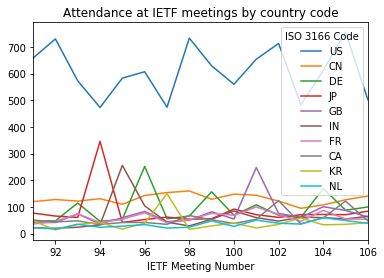

In [6]:
ax = topn_counts.plot(title="Attendance at IETF meetings by country code")
ax.set_xlabel("IETF Meeting Number")

# IETF Attendance using `ietfdata` library and the datatracker

We can produce similar graphs, more easily with more data and less code, using data stored in the IETF Datatracker and accessed using `ietfdata`.

In [109]:
from ietfdata.datatracker     import *
from ietfdata.datatracker_ext import *
import pandas as pd
import matplotlib.pyplot as plt
import dataclasses

In [ ]:
datatracker = DataTracker()

meetings = datatracker.meetings(meeting_type = datatracker.meeting_type(MeetingTypeURI('/api/v1/name/meetingtypename/ietf/')))
full_ietf_meetings = list(meetings)

In [42]:
ietf_meetings = []
for meeting in full_ietf_meetings:
    meetingd = dataclasses.asdict(meeting)
    meetingd['meeting_obj'] = meeting
    meetingd['num'] = int(meeting.number)
    ietf_meetings.append(meetingd)    

In [47]:
meetings_df = pd.DataFrame.from_records(ietf_meetings)

In [39]:
meeting110 = full_ietf_meetings[1]

One way to get the registration count for a meeting is to download every individual's meeting registration and count them. (We don't have to do this regularly, because the datatracker actually provides counts and I've confirmed they are the same.)

In [16]:
dt = DataTrackerExt()
regs = dt.meeting_registrations(meeting=meeting110)

In [25]:
registrations110 = list(regs)

In [27]:
len(registrations110)

1156

First, we can make a classic figure, looking at the attendance of all (numbered) IETF meetings, from the 1980s until today.

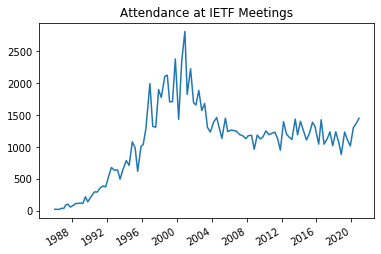

In [71]:
axes = meetings_df.plot(
    x='date',
    y='attendees',
    kind='line',
    legend=False,
    title='Attendance at IETF Meetings')
axes.set_xlabel('')
plt.show()

Do the recent virtual meetings especially stand out?

In [94]:
meetings_df['virtual'] = meetings_df.apply(lambda row: 'virtual' if row['city'] in ['Online', 'Virtual'] else 'inperson', axis=1)

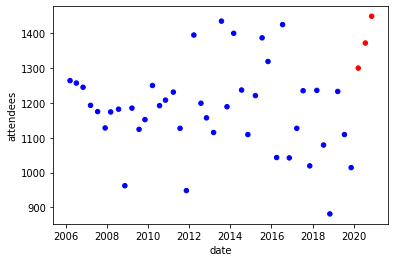

In [104]:
df = meetings_df[meetings_df['date'] > datetime(2006,1,1,0,0)]
df.plot.scatter(x='date',
       y='attendees',
       c=df['virtual'].map({'virtual':'red', 'inperson':'blue'})
)

In [149]:
meetings_df[:10]

,resource_uri,id,type,country,city,venue_name,venue_addr,date,days,time_zone,...,break_area,reg_area,proceedings_final,show_important_dates,attendees,updated,meeting_obj,num,registration_count,virtual
0,"{'uri': '/api/v1/meeting/meeting/1383/', 'para...",1383,"{'uri': '/api/v1/name/meetingtypename/ietf/', ...",US,San Francisco,,,2021-07-24,7,America/Los_Angeles,...,,,False,False,NaN,1970-01-01 00:00:00-08:00,Meeting(resource_uri=MeetingURI(uri='/api/v1/m...,111,0.0,inperson
1,"{'uri': '/api/v1/meeting/meeting/1308/', 'para...",1308,"{'uri': '/api/v1/name/meetingtypename/ietf/', ...",CZ,Online,Online,,2021-03-08,5,Europe/Prague,...,,,False,True,NaN,2021-03-01 10:18:25-08:00,Meeting(resource_uri=MeetingURI(uri='/api/v1/m...,110,1160.0,virtual
2,"{'uri': '/api/v1/meeting/meeting/1002/', 'para...",1002,"{'uri': '/api/v1/name/meetingtypename/ietf/', ...",TH,Online,,,2020-11-14,7,Asia/Bangkok,...,,Gather,True,True,1449.0,2021-01-14 10:26:53-08:00,Meeting(resource_uri=MeetingURI(uri='/api/v1/m...,109,1449.0,virtual
3,"{'uri': '/api/v1/meeting/meeting/1003/', 'para...",1003,"{'uri': '/api/v1/name/meetingtypename/ietf/', ...",ES,Online,,,2020-07-25,7,UTC,...,,Gather.Town,True,True,1372.0,2020-07-26 13:02:01-07:00,Meeting(resource_uri=MeetingURI(uri='/api/v1/m...,108,1372.0,virtual
4,"{'uri': '/api/v1/meeting/meeting/1004/', 'para...",1004,"{'uri': '/api/v1/name/meetingtypename/ietf/', ...",CA,Virtual,,,2020-03-21,7,UTC,...,,,True,True,1300.0,2020-03-19 12:05:09-07:00,Meeting(resource_uri=MeetingURI(uri='/api/v1/m...,107,1300.0,virtual
5,"{'uri': '/api/v1/meeting/meeting/882/', 'param...",882,"{'uri': '/api/v1/name/meetingtypename/ietf/', ...",SG,Singapore,Raffles City Convention Centre,80 Bras Basah Road\r\nSingapore 189673,2019-11-16,7,Asia/Singapore,...,Stamford & Fairmont Ballroom Foyers,Convention Foyer,True,True,1014.0,2019-11-16 18:58:36-08:00,Meeting(resource_uri=MeetingURI(uri='/api/v1/m...,106,1013.0,inperson
6,"{'uri': '/api/v1/meeting/meeting/881/', 'param...",881,"{'uri': '/api/v1/name/meetingtypename/ietf/', ...",CA,Montreal,Fairmont Queen Elizabeth Montreal,"900 René-Lévesque Blvd W, Montreal, QC H3B 4A5...",2019-07-20,7,America/New_York,...,Convention Floor Foyer,Square Dorchester,True,True,1109.0,2019-07-31 13:21:09-07:00,Meeting(resource_uri=MeetingURI(uri='/api/v1/m...,105,1109.0,inperson
7,"{'uri': '/api/v1/meeting/meeting/866/', 'param...",866,"{'uri': '/api/v1/name/meetingtypename/ietf/', ...",CZ,Prague,Hilton Prague,Pobřežní 1\r\n186 00 Praha 8-Florenc\r\nCzech ...,2019-03-23,7,Europe/Prague,...,Congress Hall Foyer,Congress Hall Foyer,True,True,1233.0,2019-03-24 06:28:59-07:00,Meeting(resource_uri=MeetingURI(uri='/api/v1/m...,104,1233.0,inperson
8,"{'uri': '/api/v1/meeting/meeting/805/', 'param...",805,"{'uri': '/api/v1/name/meetingtypename/ietf/', ...",TH,Bangkok,Bangkok Marriott Marquis Queen's Park,"199 Sukhumvit Sol 22, Klong Ton, Klong Toey\r\...",2018-11-03,7,Asia/Bangkok,...,2nd and 7th Floor Foyers,2nd Floor Foyer,True,True,881.0,2019-01-22 12:15:00-08:00,Meeting(resource_uri=MeetingURI(uri='/api/v1/m...,103,881.0,inperson
9,"{'uri': '/api/v1/meeting/meeting/772/', 'param...",772,"{'uri': '/api/v1/name/meetingtypename/ietf/', ...",CA,Montreal,Fairmont Queen Elizabeth Montreal,"900 René-Lévesque Blvd W\r\nMontreal, QC H3B 4...",2018-07-14,7,America/Toronto,...,Convention Floor Foyer,Mezzanine,True,True,1079.0,2018-07-18 08:58:52-07:00,Meeting(resource_uri=MeetingURI(uri='/api/v1/m...,102,1079.0,inperson


Do the country or affiliation of participants differ for the recent virtual meetings? (Or on where the meeting is physically located?)

This will construct a dataframe of every attendee's registration at every meeting. (Downloading this data takes a while!)

In [111]:
meeting_attendees_df = pd.DataFrame()
for meeting in ietf_meetings:
    if meeting['num'] > 72:
        registrations = dt.meeting_registrations(meeting=meeting['meeting_obj'])
        df = pd.DataFrame.from_records([dataclasses.asdict(x) for x in list(registrations)])
        df['num'] = meeting['num']
        meeting_attendees_df = meeting_attendees_df.append(df)

In [112]:
meeting_attendees_df

,num,resource_uri,affiliation,attended,country_code,email,first_name,id,last_name,meeting,person,reg_type,ticket_type
0,110,{'uri': '/api/v1/stats/meetingregistration/463...,,False,GB,james.ietf@gmail.com,James,46308.0,Gruessing,"{'uri': '/api/v1/meeting/meeting/1308/', 'para...","{'uri': '/api/v1/person/person/126667/', 'para...",remote hackathon,
1,110,{'uri': '/api/v1/stats/meetingregistration/463...,Akamai,False,US,mbishop@evequefou.be,Michael,46309.0,Bishop,"{'uri': '/api/v1/meeting/meeting/1308/', 'para...","{'uri': '/api/v1/person/person/116439/', 'para...",remote,full_week_pass
2,110,{'uri': '/api/v1/stats/meetingregistration/463...,Futurewei Technologies,False,US,barryleiba@computer.org,Barry,46310.0,Leiba,"{'uri': '/api/v1/meeting/meeting/1308/', 'para...","{'uri': '/api/v1/person/person/21684/', 'param...",remote,full_week_pass
3,110,{'uri': '/api/v1/stats/meetingregistration/463...,"Vigil Security, LLC",False,US,housley@vigilsec.com,Russell,46311.0,Housley,"{'uri': '/api/v1/meeting/meeting/1308/', 'para...","{'uri': '/api/v1/person/person/5376/', 'params...",remote,full_week_pass
4,110,{'uri': '/api/v1/stats/meetingregistration/463...,IETF LLC,False,US,ghwood@ietf.org,Greg,46312.0,Wood,"{'uri': '/api/v1/meeting/meeting/1308/', 'para...","{'uri': '/api/v1/person/person/120314/', 'para...",remote,full_week_pass
...,...,...,...,...,...,...,...,...,...,...,...,...,...
957,73,{'uri': '/api/v1/stats/meetingregistration/213...,Cisco Systems,True,US,mcgrew@cisco.com,David,2139.0,McGrew,"{'uri': '/api/v1/meeting/meeting/73/', 'params...",None,,
958,73,{'uri': '/api/v1/stats/meetingregistration/214...,Cisco,True,US,chmetz@cisco.com,Chris,2140.0,Metz,"{'uri': '/api/v1/meeting/meeting/73/', 'params...",None,,
959,73,{'uri': '/api/v1/stats/meetingregistration/214...,Cisco Systems,True,US,ashokn@cisco.com,Ashok,2141.0,Narayanan,"{'uri': '/api/v1/meeting/meeting/73/', 'params...",None,,
960,73,{'uri': '/api/v1/stats/meetingregistration/214...,Telchemy,True,US,alan.d.clark@telchemy.com,Alan,2142.0,Clark,"{'uri': '/api/v1/meeting/meeting/73/', 'params...",None,,


In [113]:
grouped = meeting_attendees_df.groupby(['num','country_code'])

In [137]:
country_ordering=grouped.size().unstack().sum(0).sort_values(ascending=False).index.values

In [140]:
reordered = grouped.size().unstack().reindex(columns=country_ordering)

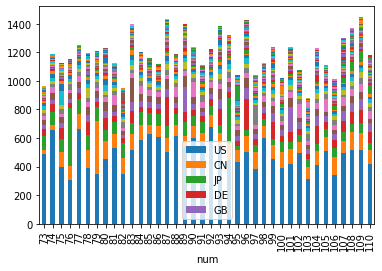

In [147]:
ax = reordered.plot(
    kind='bar',
    stacked=True,
    legend=False
)
ahandles, labels = ax.get_legend_handles_labels()
ax.legend(ahandles[:5], labels[:5])